# End-Gauge Measurement
## Example H1 from the GUM and GUM-Supplement 1

The example defines numerous input parameters with different distributions. Instead of converting all the distributions into standard uncertainty, the values can be entered using the distribution shape parameters.
Descriptions are also added for each component for display in the report tables.
Because each input may have multiple uncertainty components, we'll explicitly enter
each component using set_uncert() instead of setting a default uncertainty using set_input().

Note: GUM H1 uses all normal/standard distributions for GUM calculation. Supplement 1 describes distribution
types for Monte-Carlo.

In [1]:
%matplotlib inline
import suncal

In [2]:
u = suncal.UncertCalc('l = d - l_s*(alpha_s*d_theta + d_alpha*theta) + l_s', units='nm')

# l_s is given as u=.075 @ k=3
u.set_input('l_s', nom=50000623.6, desc='Length of standard at 20C from certificate', units='nm')
u.set_uncert('l_s', name='u_{ls}', unc=75, k=3, degf=18, desc='Uncertainty of the standard')

# Variable d has 3 uncertainties...
u.set_input('d', nom=215, desc='Measured difference between end gauges', units='nm')
# First is T-distribution with k=1 uncertainty of 10...
u.set_uncert('d', name='u_{d1}', dist='t', unc=10, conf=.95, degf=5, desc='Random effects of comparator')
# Normal with k=3...
u.set_uncert('d', name='u_{d2}', unc=20, k=3, degf=8, desc='Systematic effects of comparator')
# and a standard uncertainty.
u.set_uncert('d', name='u_d', std=5.8, degf=24, desc='Repeated obeservations')

# theta has 2 uncertainty components.
# Arcsine distribution specified with half-width parameter a
u.set_input('theta', nom=-0.1, desc='Deviation in temperature of test bed from 20C ambient', units='delta_degC')
u.set_uncert('theta', name='u_Delta', dist='arcsine', a=0.5, desc='Cyclic variation of temperature in room')
u.set_uncert('theta', name='u_theta', std=0.2, desc='Mean temperature of the bed')

# Uniform distribution specified with half-width parameter a
u.set_input('alpha_s', nom=1.15E-5, desc='Coefficient of thermal expansion', units='1/delta_degC')
u.set_uncert('alpha_s', name='u_{alpha_s}', dist='uniform', a=2E-6, desc='Thermal expansion coefficient of standard')

# Curvilinear Trapezoid distribution takes half-width a and curvature d
u.set_input('d_alpha', nom=0, desc='Difference in expansion coefficients', units='1/delta_degC')
u.set_uncert('d_alpha', name='u_{da}', dist='curvtrap', a=1E-6, d=0.1E-6, degf=50, desc='Difference in expansion coefficients')  # Curvilinear Trapezoid (See GUM-S1)

u.set_input('d_theta', nom=0, desc='Difference in temperatures', units='delta_degC')
u.set_uncert('d_theta', name='u_{dt}', dist='curvtrap', a=.05, d=.025, degf=2, desc='Difference in temperatures')

u.calculate()

$l = d - l_{s} \left(\alpha_{s} d_{\theta} + d_{\alpha} \theta\right) + l_{s}$


Method             | Mean      | Standard Uncertainty  
------------------|---------|----------------------
GUM Approximation  | 5.0000839e+07 nm  | 32 nm              
Monte Carlo        | 5.0000839e+07 nm  | 34 nm

In [3]:
u.out.report_inputs()

Variable   | Mean      | Std. Uncertainty   | Deg. Freedom   | Description                                           
----------|---------|------------------|--------------|------------------------------------------------------
$l_{s}$   | 5.0000624e+07 nm  | 25 nm           | 18       | Length of standard at 20C from certificate            
$d$   | 215.0 nm  | 9.7 nm           | 26       | Measured difference between end gauges                
$\theta$   | -0.10 Δcelsius  | 0.41 Δcelsius           | inf       | Deviation in temperature of test bed from 20C ambient 
$\alpha_{s}$   | 0.0000115 1/Δcelsius  | 1.2e-06 1/Δcelsius          | inf      | Coefficient of thermal expansion                      
$d_{\alpha}$   | 0.0 1/Δcelsius | 5.8e-07 1/Δcelsius          | 50      | Difference in expansion coefficients                  
$d_{\theta}$   | 0.0 Δcelsius | 0.030 Δcelsius          | 2.0      | Difference in temperatures

In [4]:
u.out.report_components()

Variable   | Component   | Description                                            | Standard Uncertainty   | Deg. Freedom  
----------|-----------|------------------------------------------------------|----------------------|--------------
$l_{s}$   | -           | Length of standard at 20C from certificate             | 25 nm               | 18.0          
-          | $u_{ls}$    | Uncertainty of the standard                            | 25 nm               | 18.0          
$d$   | -           | Measured difference between end gauges                 | 9.7 nm               | 25.6          
-          | $u_{d1}$    | Random effects of comparator                           | 3.9 nm               | 5.0           
-          | $u_{d2}$    | Systematic effects of comparator                       | 6.7 nm               | 8.0           
-          | $u_{d}$    | Repeated obeservations                                 | 5.8 nm               | 24.0          
$\theta$   | -           | Deviation in temperature of test bed from 20C ambient  | 0.41 Δcelsius               | inf           
-          | $u_{\Delta}$    | Cyclic variation of temperature in room                | 0.35 Δcelsius               | inf           
-          | $u_{\theta}$    | Mean temperature of the bed                            | 0.20 Δcelsius               | inf           
$\alpha_{s}$   | -           | Coefficient of thermal expansion                       | 1.2e-06 1/Δcelsius               | inf           
-          | $u_{alpha_s}$   | Thermal expansion coefficient of standard              | 1.2e-06 1/Δcelsius              | inf           
$d_{\alpha}$  | -           | Difference in expansion coefficients                   | 5.8e-07 1/Δcelsius              | 50.0          
-          | $u_{da}$   | Difference in expansion coefficients                   | 5.8e-07 1/Δcelsius              | 50.0          
$d_{\theta}$  | -           | Difference in temperatures                             | 0.030 Δcelsius              | 2.0           
-          | $u_{dt}$   | Difference in temperatures                             | 0.030 Δcelsius              | 2.0

In [5]:
u.out.report_expanded()

### GUM Approximation


Interval   | Min       | Max       | k         | Deg. Freedom   | Expanded Uncertainty  
----------|---------|---------|---------|--------------|----------------------
99.00%     | 5.0000745e+07 nm  | 5.0000932e+07 nm  | 2.926     | 15.78          | 94 nm              
95.00%     | 5.0000771e+07 nm  | 5.0000907e+07 nm  | 2.122     | 15.78          | 68 nm              
90.00%     | 5.0000783e+07 nm  | 5.0000895e+07 nm  | 1.747     | 15.78          | 56 nm              
68.00%     | 5.0000806e+07 nm  | 5.0000871e+07 nm | 1.027     | 15.78          | 33 nm             


### Monte Carlo

Symmetric Coverage Intervals

Interval   | Min       | Max       | k        
----------|---------|---------|---------
99.00%     | 5.0000750e+07 nm  | 5.0000926e+07 nm  | 2.571    
95.00%     | 5.0000772e+07 nm  | 5.0000905e+07 nm  | 1.958    
90.00%     | 5.0000782e+07 nm  | 5.0000895e+07 nm  | 1.644    
68.00%     | 5.0000805e+07 nm  | 5.0000873e+07 nm  | 0.996

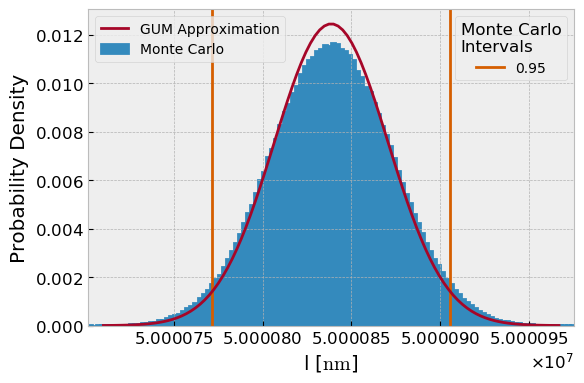

In [6]:
# Compare to GUM-Supplement1 Figure 17
u.out.plot_pdf(intervals=[.95]);

In [7]:
u.out.report_derivation()

### Model Equation:

$l = d - l_{s} \left(\alpha_{s} d_{\theta} + d_{\alpha} \theta\right) + l_{s}$

### Input Definitions:


Variable   | Std. Uncertainty  
----------|------------------
$l_{s} = 5.0 \cdot 10^{7}\,\mathrm{nm}$   | $u_{l_s} = 25.0\,\mathrm{nm}$          
$d = 215.0\,\mathrm{nm}$   | $u_{d} = 9.655\,\mathrm{nm}$          
$\theta = -0.1\,\mathrm{ \Delta celsius}$   | $u_{theta} = 0.4062\,\mathrm{ \Delta celsius}$          
$\alpha_{s} = 1.15 \cdot 10^{-5}\,\frac{1}{\mathrm{ \Delta celsius}}$   | $u_{alpha_s} = 1.155 \cdot 10^{-6}\,\frac{1}{\mathrm{ \Delta celsius}}$          
$d_{\alpha} = 0\,\frac{1}{\mathrm{ \Delta celsius}}$   | $u_{d_alpha} = 5.783 \cdot 10^{-7}\,\frac{1}{\mathrm{ \Delta celsius}}$         
$d_{\theta} = 0\,\mathrm{ \Delta celsius}$  | $u_{d_theta} = 0.03005\,\mathrm{ \Delta celsius}$         


### Sensitivity Coefficients:

$c_{l s} = \frac{\partial}{\partial l_{s}} l = - \alpha_{s} d_{\theta} - d_{\alpha} \theta + 1 = 1.0\,$

$c_{d} = \frac{\partial}{\partial d} l = 1 = 1.0$

$c_{\theta} = \frac{\partial}{\partial \theta} l = - d_{\alpha} l_{s} = 0\,\frac{\mathrm{nm}}{\mathrm{ \Delta celsius}}$

$c_{\alpha s} = \frac{\partial}{\partial \alpha_{s}} l = - d_{\theta} l_{s} = 0\,\mathrm{nm} \cdot \mathrm{ \Delta celsius}$

$c_{d \alpha} = \frac{\partial}{\partial d_{\alpha}} l = - l_{s} \theta = 5.0 \cdot 10^{6}\,\mathrm{nm} \cdot \mathrm{ \Delta celsius}$

$c_{d \theta} = \frac{\partial}{\partial d_{\theta}} l = - \alpha_{s} l_{s} = -575.0\,\frac{\mathrm{nm}}{\mathrm{ \Delta celsius}}$

### Combined uncertainty:

$u_{l} = \sqrt{c_{\alpha s}^{2} u_{\alpha s}^{2} + c_{d}^{2} u_{d}^{2} + c_{d \alpha}^{2} u_{d \alpha}^{2} + c_{d \theta}^{2} u_{d \theta}^{2} + c_{l s}^{2} u_{l s}^{2} + c_{\theta}^{2} u_{\theta}^{2}}$

$u_{l} = \sqrt{u_{\alpha s}^{2} \left(\frac{\partial}{\partial \alpha_{s}} l\right)^{2} + u_{d}^{2} \left(\frac{\partial}{\partial d} l\right)^{2} + u_{d \alpha}^{2} \left(\frac{\partial}{\partial d_{\alpha}} l\right)^{2} + u_{d \theta}^{2} \left(\frac{\partial}{\partial d_{\theta}} l\right)^{2} + u_{l s}^{2} \left(\frac{\partial}{\partial l_{s}} l\right)^{2} + u_{\theta}^{2} \left(\frac{\partial}{\partial \theta} l\right)^{2}}$

$u_{l} = \sqrt{\alpha_{s}^{2} l_{s}^{2} u_{d \theta}^{2} + d_{\alpha}^{2} l_{s}^{2} u_{\theta}^{2} + d_{\theta}^{2} l_{s}^{2} u_{\alpha s}^{2} + l_{s}^{2} \theta^{2} u_{d \alpha}^{2} + u_{d}^{2} + u_{l s}^{2} \left(- \alpha_{s} d_{\theta} - d_{\alpha} \theta + 1\right)^{2}} = 32.02\,\mathrm{nm}$

### Effective degrees of freedom:

$\nu_{eff} = \frac{u_{l}^{4}}{\frac{c_{\alpha s}^{4} u_{\alpha s}^{4}}{\nu_{\alpha s}} + \frac{c_{d}^{4} u_{d}^{4}}{\nu_{d}} + \frac{c_{d \alpha}^{4} u_{d \alpha}^{4}}{\nu_{d \alpha}} + \frac{c_{d \theta}^{4} u_{d \theta}^{4}}{\nu_{d \theta}} + \frac{c_{l s}^{4} u_{l s}^{4}}{\nu_{l s}} + \frac{c_{\theta}^{4} u_{\theta}^{4}}{\nu_{\theta}}} = 15.78$


---